# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import gzip
import json
from datetime import datetime, date
import numpy as np
import os

## Getting the data ready to be analyzed

In [2]:
# to do not waste too much memory
if not os.path.isfile('spanish_precompiled_df/spanish_user_warnings_df.pkl'):
    spanish_user_warnings_df = list()
    with gzip.open('eswiki_20210201_refactored_user_warnigs_transcluded_dataset.json.gz', 'rb') as json_file:      
        for i, l in enumerate(json_file.readlines()):
            spanish_user_warnings_df.append(json.loads(l.decode('utf-8')))
            if i > 0 and i % 100000 == 0:
                print('I have done {} lines so far'.format(i))
    spanish_user_warnings_df = pd.DataFrame(spanish_user_warnings_df)
    spanish_user_warnings_df.to_pickle('spanish_precompiled_df/spanish_user_warnings_df.pkl')
else:
    spanish_user_warnings_df = pd.read_pickle('spanish_precompiled_df/spanish_user_warnings_df.pkl')

In [3]:
# spanish_user_warnings_df.head()

In [4]:
spanish_user_warnings_df.shape

(45639, 4)

In [5]:
spanish_user_warnings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45639 entries, 0 to 45638
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_warnings_recieved  45639 non-null  object
 1   user_warnings_stats     45639 non-null  object
 2   id_talk_page            45639 non-null  int64 
 3   name                    45639 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [6]:
spanish_user_warnings_df.describe()

id_talk_page
count  4.563900e+04
mean   4.717399e+06
std    2.905083e+06
min    7.895000e+03
25%    1.837632e+06
50%    4.753342e+06
75%    7.401266e+06
max    9.778400e+06

## Categories analysis

In [7]:
# Load the datasets
if os.path.isfile('spanish_precompiled_df/spanish_user_warnings_counter_total.pkl') and os.path.isfile('spanish_precompiled_df/spanish_user_warnings_counter_substituted.pkl') and os.path.isfile('spanish_precompiled_df/spanish_user_warnings_counter_transcluded.pkl'):
    spanish_user_warnings_counter_total_df = pd.read_pickle('spanish_precompiled_df/spanish_user_warnings_counter_total.pkl')
    spanish_user_warnings_counter_substituted_df = pd.read_pickle('spanish_precompiled_df/spanish_user_warnings_counter_substituted.pkl')
    spanish_user_warnings_counter_transcluded_df = pd.read_pickle('spanish_precompiled_df/spanish_user_warnings_counter_transcluded.pkl')
else:
    spanish_user_warnings_counter_transcluded_df = list()
    spanish_user_warnings_counter_substituted_df = list()
    spanish_user_warnings_counter_total_df = list()

    year_total_dict = dict()
    year_transcluded_dict = dict()
    year_substituted_dict = dict()

    # iterating over the previous dataset
    for i, row in spanish_user_warnings_df.iterrows():

        # explicit the user warnings
        for year in row['user_warnings_stats']:

            if not year in year_total_dict:
                year_total_dict[year] = dict()
                year_transcluded_dict[year] = dict()
                year_substituted_dict[year] = dict()

            for month in row['user_warnings_stats'][year]:

                if not month in year_total_dict[year]:
                    year_total_dict[year][month] = dict()
                    year_transcluded_dict[year][month] = dict()
                    year_substituted_dict[year][month] = dict()

                    year_total_dict[year][month]['serious'] = 0
                    year_total_dict[year][month]['warning'] = 0
                    year_total_dict[year][month]['not_serious'] = 0

                    year_transcluded_dict[year][month]['serious'] = 0
                    year_transcluded_dict[year][month]['warning'] = 0
                    year_transcluded_dict[year][month]['not_serious'] = 0

                    year_substituted_dict[year][month]['serious'] = 0
                    year_substituted_dict[year][month]['warning'] = 0
                    year_substituted_dict[year][month]['not_serious'] = 0

                serious_transcluded = row['user_warnings_stats'][year][month]['serious_transcluded']
                warning_transcluded = row['user_warnings_stats'][year][month]['warning_transcluded']
                not_serious_transcluded = row['user_warnings_stats'][year][month]['not_serious_transcluded']

                serious_substituted = row['user_warnings_stats'][year][month]['serious_substituted']
                warning_substituted = row['user_warnings_stats'][year][month]['warning_substituted']
                not_serious_substituted = row['user_warnings_stats'][year][month]['not_serious_substituted']

                year_total_dict[year][month]['serious'] += serious_transcluded + serious_substituted
                year_total_dict[year][month]['warning'] += warning_transcluded + warning_substituted
                year_total_dict[year][month]['not_serious'] += not_serious_transcluded + not_serious_substituted

                year_transcluded_dict[year][month]['serious'] += serious_transcluded
                year_transcluded_dict[year][month]['warning'] += warning_transcluded
                year_transcluded_dict[year][month]['not_serious'] += not_serious_transcluded

                year_substituted_dict[year][month]['serious'] += serious_substituted
                year_substituted_dict[year][month]['warning'] += warning_substituted
                year_substituted_dict[year][month]['not_serious'] += not_serious_substituted           

    for year in year_total_dict:
        for month in year_total_dict[year]:
            row = dict()

            row['date'] = '-'.join([year, month])
            row['serious'] = year_total_dict[year][month]['serious']
            row['warning'] = year_total_dict[year][month]['warning']
            row['not_serious'] = year_total_dict[year][month]['not_serious']

            spanish_user_warnings_counter_total_df.append(row)

            row = dict()
            row['date'] = '-'.join([year, month])
            row['serious'] = year_transcluded_dict[year][month]['serious']
            row['warning'] = year_transcluded_dict[year][month]['warning']
            row['not_serious'] = year_transcluded_dict[year][month]['not_serious']

            spanish_user_warnings_counter_transcluded_df.append(row)

            row = dict()
            row['date'] = '-'.join([year, month])
            row['serious'] = year_substituted_dict[year][month]['serious']
            row['warning'] = year_substituted_dict[year][month]['warning']
            row['not_serious'] = year_substituted_dict[year][month]['not_serious']

            spanish_user_warnings_counter_substituted_df.append(row)

    spanish_user_warnings_counter_total_df = pd.DataFrame(spanish_user_warnings_counter_total_df).reset_index(drop=True)
    spanish_user_warnings_counter_total_df['date'] = pd.to_datetime(spanish_user_warnings_counter_total_df['date']).dt.date
    spanish_user_warnings_counter_total_df = spanish_user_warnings_counter_total_df.sort_values('date')
    spanish_user_warnings_counter_total_df.to_pickle('spanish_precompiled_df/spanish_user_warnings_counter_total.pkl')


    spanish_user_warnings_counter_substituted_df = pd.DataFrame(spanish_user_warnings_counter_substituted_df).reset_index(drop=True)
    spanish_user_warnings_counter_substituted_df['date'] = pd.to_datetime(spanish_user_warnings_counter_substituted_df['date']).dt.date
    spanish_user_warnings_counter_substituted_df = spanish_user_warnings_counter_substituted_df.sort_values('date')
    spanish_user_warnings_counter_substituted_df.to_pickle('spanish_precompiled_df/spanish_user_warnings_counter_substituted.pkl')

    spanish_user_warnings_counter_transcluded_df = pd.DataFrame(spanish_user_warnings_counter_transcluded_df).reset_index(drop=True)
    spanish_user_warnings_counter_transcluded_df['date'] = pd.to_datetime(spanish_user_warnings_counter_transcluded_df['date']).dt.date
    spanish_user_warnings_counter_transcluded_df = spanish_user_warnings_counter_transcluded_df.sort_values('date')
    spanish_user_warnings_counter_transcluded_df.to_pickle('spanish_precompiled_df/spanish_user_warnings_counter_transcluded.pkl')

## Total amount of user warnings recieved

In [8]:
spanish_user_warnings_counter_total_df.head()

date  serious  warning  not_serious
204  2003-01-01        0        0            0
205  2003-02-01        0        0            0
206  2003-03-01        0        0            0
207  2003-04-01        0        0            0
208  2003-05-01        0        0            0

In [9]:
spanish_user_warnings_counter_total_df.tail()

date  serious  warning  not_serious
139  2021-08-01        0        0            0
140  2021-09-01        0        0            0
141  2021-10-01        0        0            0
142  2021-11-01        0        0            0
143  2021-12-01        0        0            0

In [10]:
spanish_user_warnings_counter_total_df.shape

(228, 4)

In [11]:
spanish_user_warnings_counter_total_df.describe()

serious     warning  not_serious
count  228.000000  228.000000   228.000000
mean    16.706140    6.837719   199.368421
std     44.311041   10.273570   204.536772
min      0.000000    0.000000     0.000000
25%      1.000000    0.000000     6.750000
50%      4.000000    3.000000   172.500000
75%     10.250000   10.000000   277.500000
max    401.000000   70.000000  1221.000000

## Total amount of user warnings grouped by category

In [12]:
spanish_user_warnings_counter_total_registered_df = spanish_user_warnings_counter_total_df.sum().to_frame().reset_index().set_axis(['category', 'count'], axis='columns')
spanish_user_warnings_counter_total_registered_df.head()

category  count
0      serious   3809
1      warning   1559
2  not_serious  45456

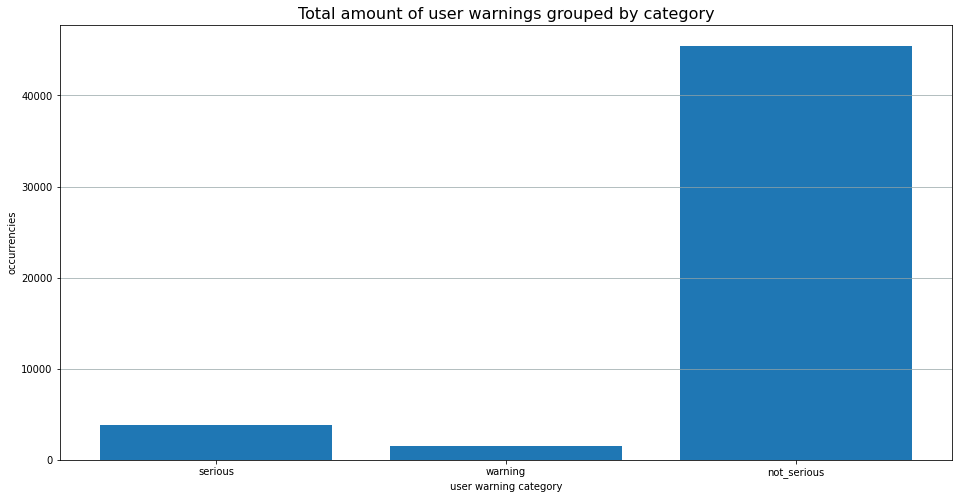

In [13]:
plt.figure(figsize=(16,8))
plt.bar(spanish_user_warnings_counter_total_registered_df['category'], spanish_user_warnings_counter_total_registered_df['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='horizontal')
plt.title('Total amount of user warnings grouped by category', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning category')
plt.show()

## Total amount of transcluded user warnings recieved 

In [14]:
spanish_user_warnings_counter_transcluded_df.head()

date  serious  warning  not_serious
204  2003-01-01        0        0            0
205  2003-02-01        0        0            0
206  2003-03-01        0        0            0
207  2003-04-01        0        0            0
208  2003-05-01        0        0            0

In [15]:
spanish_user_warnings_counter_transcluded_df.tail()

date  serious  warning  not_serious
139  2021-08-01        0        0            0
140  2021-09-01        0        0            0
141  2021-10-01        0        0            0
142  2021-11-01        0        0            0
143  2021-12-01        0        0            0

In [16]:
spanish_user_warnings_counter_transcluded_df.shape

(228, 4)

In [17]:
spanish_user_warnings_counter_transcluded_df.describe()

serious     warning  not_serious
count  228.000000  228.000000   228.000000
mean    16.706140    6.837719   199.368421
std     44.311041   10.273570   204.536772
min      0.000000    0.000000     0.000000
25%      1.000000    0.000000     6.750000
50%      4.000000    3.000000   172.500000
75%     10.250000   10.000000   277.500000
max    401.000000   70.000000  1221.000000

## Line graph user showing the user warnings recieved monthly (transcluded amount)

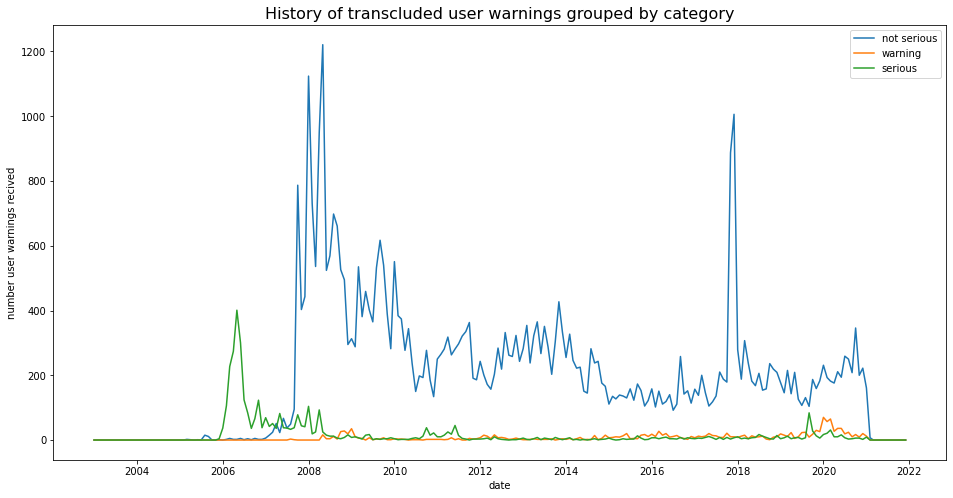

In [18]:
plt.figure(figsize=(16,8))
plt.plot(spanish_user_warnings_counter_transcluded_df['date'], spanish_user_warnings_counter_transcluded_df['not_serious'], label = 'not serious')
plt.plot(spanish_user_warnings_counter_transcluded_df['date'], spanish_user_warnings_counter_transcluded_df['warning'], label = 'warning')
plt.plot(spanish_user_warnings_counter_transcluded_df['date'], spanish_user_warnings_counter_transcluded_df['serious'], label = 'serious')
plt.legend()
plt.title('History of transcluded user warnings grouped by category', fontsize=16)
plt.ylabel('number user warnings recived')
plt.xlabel('date')
plt.show()

In [19]:
fig = px.line(spanish_user_warnings_counter_transcluded_df, x='date', y=['not_serious', 'warning', 'serious'], labels={"value": "number of total user warnings recieved", "variable": "user warning category"}, title='History of transcluded user warnings grouped by category')
fig.show()

## Total amount of transcluded user warnings grouped by category

In [20]:
spanish_user_warnings_counter_transcluded_registered_df = spanish_user_warnings_counter_transcluded_df.sum().to_frame().reset_index().set_axis(['category', 'count'], axis='columns')
spanish_user_warnings_counter_transcluded_registered_df.head()

category  count
0      serious   3809
1      warning   1559
2  not_serious  45456

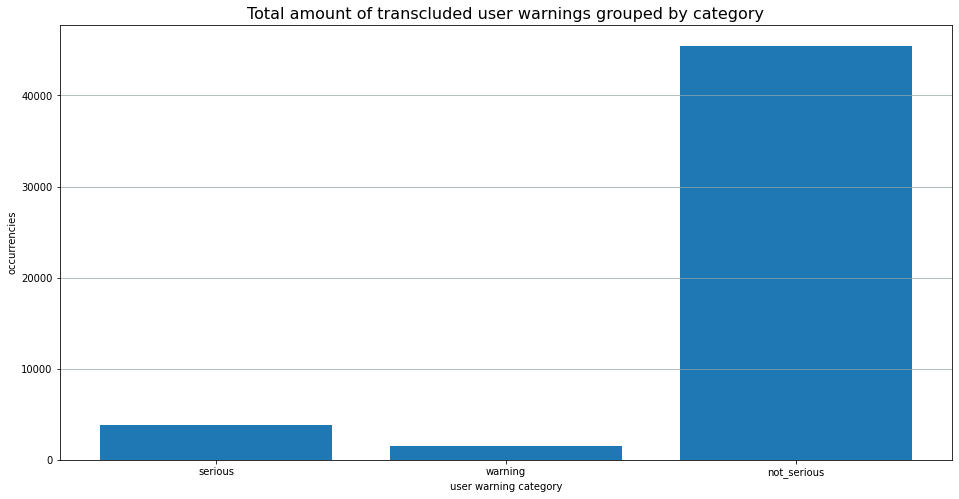

In [21]:
plt.figure(figsize=(16,8))
plt.bar(spanish_user_warnings_counter_transcluded_registered_df['category'], spanish_user_warnings_counter_transcluded_registered_df['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='horizontal')
plt.title('Total amount of transcluded user warnings grouped by category', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning category')
plt.show()

## Total amount of substituted user warnings recieved 

In [22]:
spanish_user_warnings_counter_substituted_df.head()

date  serious  warning  not_serious
204  2003-01-01        0        0            0
205  2003-02-01        0        0            0
206  2003-03-01        0        0            0
207  2003-04-01        0        0            0
208  2003-05-01        0        0            0

In [23]:
spanish_user_warnings_counter_substituted_df.head()

date  serious  warning  not_serious
204  2003-01-01        0        0            0
205  2003-02-01        0        0            0
206  2003-03-01        0        0            0
207  2003-04-01        0        0            0
208  2003-05-01        0        0            0

In [24]:
spanish_user_warnings_counter_substituted_df.shape

(228, 4)

In [25]:
spanish_user_warnings_counter_substituted_df.describe()

serious  warning  not_serious
count    228.0    228.0        228.0
mean       0.0      0.0          0.0
std        0.0      0.0          0.0
min        0.0      0.0          0.0
25%        0.0      0.0          0.0
50%        0.0      0.0          0.0
75%        0.0      0.0          0.0
max        0.0      0.0          0.0

## Total amount substituted user warnings grouped by category

In [26]:
spanish_user_warnings_counter_substituted_registered_df = spanish_user_warnings_counter_substituted_df.sum().to_frame().reset_index().set_axis(['category', 'count'], axis='columns')
spanish_user_warnings_counter_substituted_registered_df.head()

category  count
0      serious      0
1      warning      0
2  not_serious      0

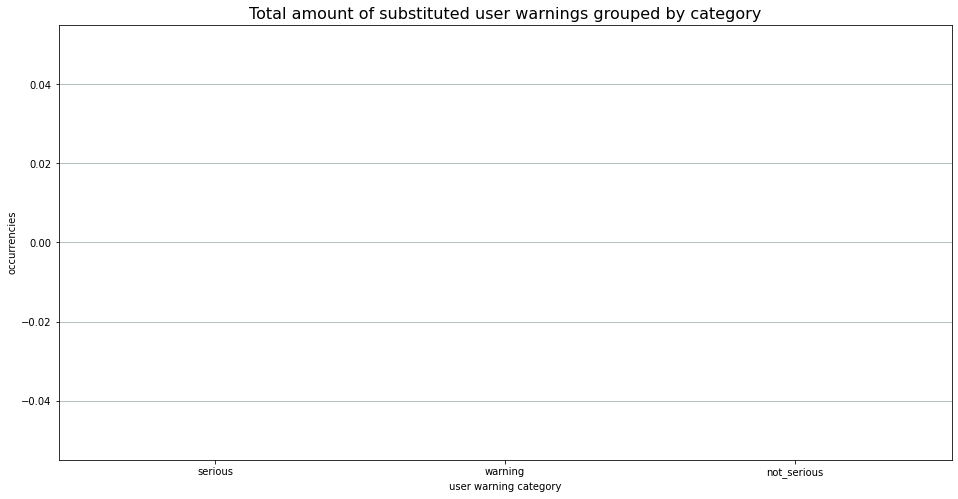

In [27]:
plt.figure(figsize=(16,8))
plt.bar(spanish_user_warnings_counter_substituted_registered_df['category'], spanish_user_warnings_counter_substituted_registered_df['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='horizontal')
plt.title('Total amount of substituted user warnings grouped by category', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning category')
plt.show()

## Explicit user warnings recieved

In [28]:
if not os.path.isfile('spanish_precompiled_df/spanish_user_warnings_refactored.pkl'):
    spanish_user_warnings_refactored_df = list()
    # iterating over the previous dataset
    for i, row in spanish_user_warnings_df.iterrows():
        # explicit the user warnings
        for el in row['user_warnings_recieved']:
            new_row = row
            new_row = new_row.drop('user_warnings_recieved')
            new_row = new_row.drop('user_warnings_stats')
            new_row['user_warning_name'] = el['user_warning_name']
            new_row['category'] = el['category']
            new_row['parameters'] = el['parameters']
            new_row['transcluded'] = el['transluded']
            if el['parameters']:
                new_row['date'] = datetime.fromisoformat(el['parameters'][0]['timestamp'].replace('Z', '+00:00'))
            else:
                new_row['date'] = None
            spanish_user_warnings_refactored_df.append(new_row)
        if i % 10000 == 0 and i > 0:
            print('I have done {} lines so far'.format(i))
    spanish_user_warnings_refactored_df = pd.DataFrame(spanish_user_warnings_refactored_df).reset_index(drop=True)
    #spanish_user_warnings_refactored_df.head()
    spanish_user_warnings_refactored_df.to_pickle('spanish_precompiled_df/spanish_user_warnings_refactored.pkl')
else:
    spanish_user_warnings_refactored_df = pd.read_pickle('spanish_precompiled_df/spanish_user_warnings_refactored.pkl')

In [29]:
spanish_user_warnings_refactored_df.shape

(50824, 7)

In [30]:
spanish_user_warnings_refactored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50824 entries, 0 to 50823
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id_talk_page       50824 non-null  int64              
 1   name               50824 non-null  object             
 2   user_warning_name  50824 non-null  object             
 3   category           50824 non-null  object             
 4   parameters         50824 non-null  object             
 5   transcluded        50824 non-null  bool               
 6   date               50824 non-null  datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 2.4+ MB


In [31]:
spanish_user_warnings_refactored_df.describe()

id_talk_page
count  5.082400e+04
mean   4.702955e+06
std    2.888172e+06
min    7.895000e+03
25%    1.850470e+06
50%    4.733750e+06
75%    7.344071e+06
max    9.778400e+06

## Bar chart representing the most used user warnings

In [32]:
spanish_user_warnings_refactored_template_occurrencies_with_count_df = spanish_user_warnings_refactored_df
spanish_user_warnings_refactored_template_occurrencies_with_count_df['count'] = 1

spanish_user_warnings_refactored_template_occurrencies_total_df = spanish_user_warnings_refactored_template_occurrencies_with_count_df[['user_warning_name', 'count']].groupby('user_warning_name').sum().reset_index().sort_values('count', ascending=False)
spanish_user_warnings_refactored_template_occurrencies_transcluded_df = spanish_user_warnings_refactored_template_occurrencies_with_count_df.loc[spanish_user_warnings_refactored_template_occurrencies_with_count_df['transcluded'] == True, ['user_warning_name', 'count']].groupby('user_warning_name').count().reset_index().sort_values('count', ascending=False)
spanish_user_warnings_refactored_template_occurrencies_substituted_df = spanish_user_warnings_refactored_template_occurrencies_with_count_df.loc[spanish_user_warnings_refactored_template_occurrencies_with_count_df['transcluded'] == False, ['user_warning_name', 'count']].groupby('user_warning_name').count().reset_index().sort_values('count', ascending=False)

## Total amount of user warnings templates grouped by user warnings template

In [33]:
spanish_user_warnings_refactored_template_occurrencies_total_df.head()

user_warning_name  count
61          desbloquear  23411
52           bienvenida  13649
63  desbloqueo revisado   4035
80           vandalismo   2330
72            respuesta   1319

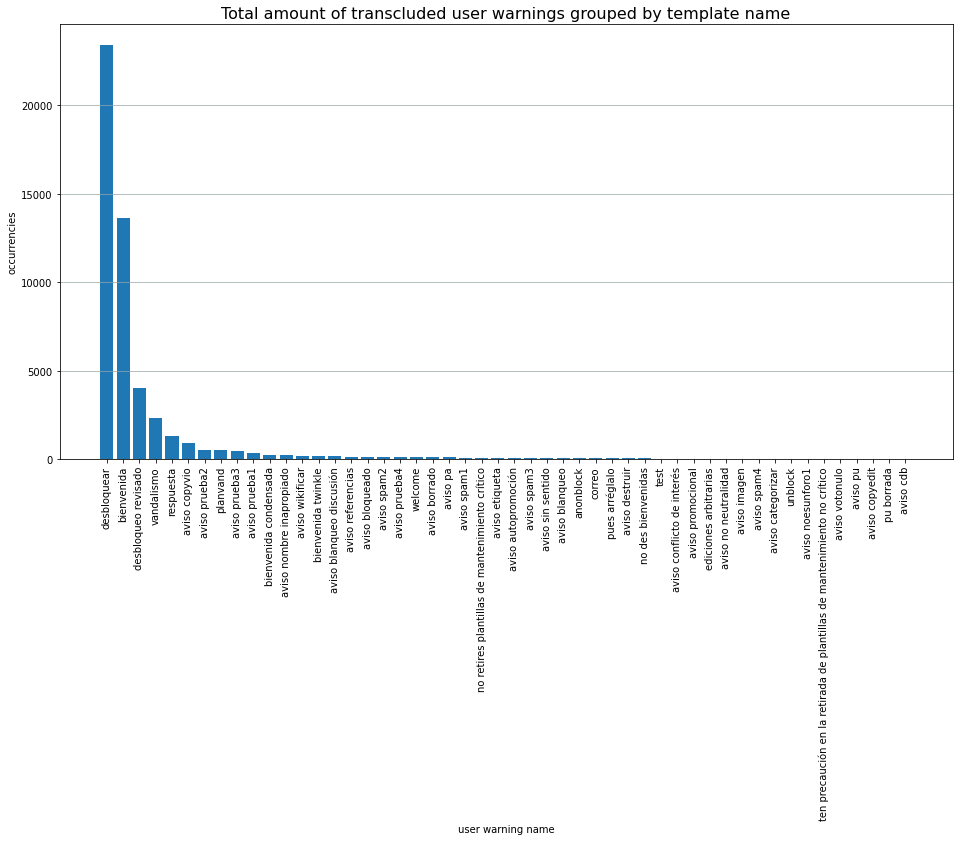

In [34]:
first_fifty = spanish_user_warnings_refactored_template_occurrencies_total_df[:50]

plt.figure(figsize=(16,8))
plt.bar(first_fifty['user_warning_name'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total amount of transcluded user warnings grouped by template name', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning name')
plt.show()

## Total amount of transcluded user warnings templates grouped by user warnings template

In [35]:
spanish_user_warnings_refactored_template_occurrencies_transcluded_df.head()

user_warning_name  count
61          desbloquear  23411
52           bienvenida  13649
63  desbloqueo revisado   4035
80           vandalismo   2330
72            respuesta   1319

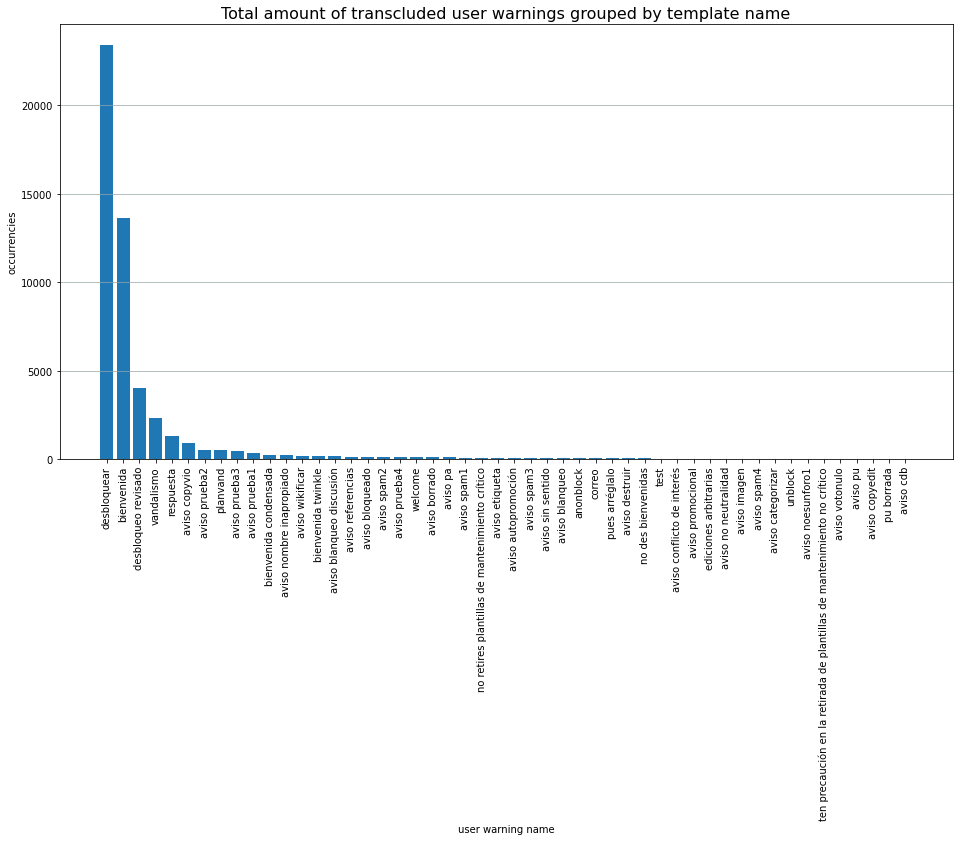

In [36]:
first_fifty = spanish_user_warnings_refactored_template_occurrencies_transcluded_df[:50]

plt.figure(figsize=(16,8))
plt.bar(first_fifty['user_warning_name'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total amount of transcluded user warnings grouped by template name', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning name')
plt.show()

## Total amount of substituted user warnings templates grouped by user warnings template

In [37]:
spanish_user_warnings_refactored_template_occurrencies_substituted_df.head()

Empty DataFrame
Columns: [user_warning_name, count]
Index: []

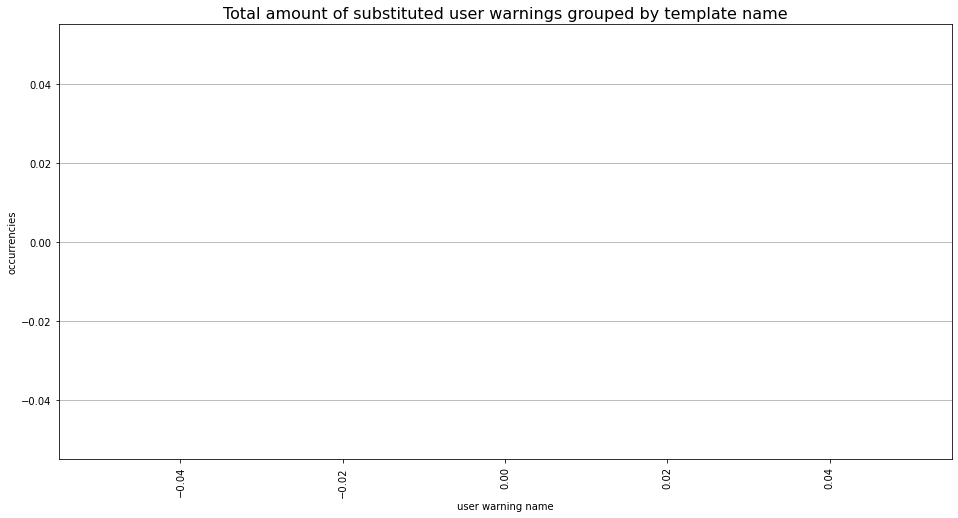

In [38]:
first_fifty = spanish_user_warnings_refactored_template_occurrencies_substituted_df[:50]

plt.figure(figsize=(16,8))
plt.bar(first_fifty['user_warning_name'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Total amount of substituted user warnings grouped by template name', fontsize=16)
plt.ylabel('occurrencies')
plt.xlabel('user warning name')
plt.show()

## User warnings name in time

In [39]:
user_warnings_names = spanish_user_warnings_refactored_df['user_warning_name'].unique()
user_warnings_names

array(['desbloquear', 'bienvenida', 'respuesta', 'desbloqueo revisado',
       'aviso borrado', 'vandalismo', 'aviso pdd', 'aviso prueba2',
       'welcome', 'pues arréglalo', 'correo', 'aviso blanqueo discusión',
       'aviso etiqueta', 'aviso bloqueado', 'ediciones arbitrarias',
       'aviso referencias', 'pu borrada', 'aviso nombre inapropiado',
       'aviso prueba1', 'bienvenida condensada', 'no des bienvenidas',
       'aviso prueba3', 'aviso sin relevancia', 'aviso sin sentido',
       'aviso spam2', 'unblock', 'aviso copyvio', 'aviso wikificar',
       'aviso prueba4', 'aviso autopromoción', 'aviso cdb',
       'aviso contextualizar', 'planvand', 'aviso copyedit', 'test',
       'aviso noesunforo2', 'aviso noesunforo1', 'aviso spam4',
       'aviso no neutralidad', 'aviso blanqueo', 'aviso promocional',
       'anonblock', 'no retires plantillas de mantenimiento crítico',
       'aviso spam3', 'aviso conflicto de interés', 'aviso spam1',
       'aviso destruir', 'bienvenida a

In [40]:
user_warnings_by_name_df = spanish_user_warnings_refactored_template_occurrencies_with_count_df
user_warnings_by_name_df['date'] = pd.to_datetime(spanish_user_warnings_refactored_template_occurrencies_with_count_df['date']).dt.date
user_warnings_by_name_df['date'] = user_warnings_by_name_df['date'].apply(lambda dt: dt.replace(day=1))

user_warnings_by_name_transcluded = user_warnings_by_name_df.loc[user_warnings_by_name_df['transcluded'] == True]
user_warnings_by_name_substituted = user_warnings_by_name_df.loc[user_warnings_by_name_df['transcluded'] == False]

## User warnings over time considering only transcluded templates occurrencies

In [41]:
# user_warnings_by_name_transcluded.head()

In [42]:
user_warnings_by_name_transcluded = user_warnings_by_name_transcluded[['user_warning_name', 'date', 'count']].groupby(['user_warning_name', 'date']).sum().reset_index()
user_warnings_by_name_transcluded.head()

user_warning_name        date  count
0         anonblock  2008-05-01      1
1         anonblock  2008-06-01      1
2         anonblock  2008-09-01      1
3         anonblock  2008-11-01      1
4         anonblock  2009-03-01      1

In [43]:
user_warnings_by_name_transcluded.shape

(2579, 3)

In [44]:
user_warnings_by_name_transcluded.describe()

count
count  2579.000000
mean     19.706863
std      63.805253
min       1.000000
25%       1.000000
50%       2.000000
75%       9.500000
max    1067.000000

#### Clean data

In [45]:
user_warnings_by_name_transcluded_cleaned_df = list()
dates_to_consider = [ d for d in spanish_user_warnings_counter_total_df['date'].unique() if d <= date(2021, 1, 1)]
for d in dates_to_consider:
    for u_w in user_warnings_names:
        elem = user_warnings_by_name_transcluded.loc[(user_warnings_by_name_transcluded['date'] == d) & (user_warnings_by_name_transcluded['user_warning_name'] == u_w)]
        if elem.empty:
            user_warnings_by_name_transcluded_cleaned_df.append([u_w, d, 0])
        else:
            user_warnings_by_name_transcluded_cleaned_df.append(np.array(elem)[0])
user_warnings_by_name_transcluded_cleaned_df = pd.DataFrame(user_warnings_by_name_transcluded_cleaned_df).reset_index(drop=True).set_axis(['user_warning_name', 'date', 'count'], axis=1)
user_warnings_by_name_transcluded_cleaned_df.head()

user_warning_name        date  count
0          desbloquear  2003-01-01      0
1           bienvenida  2003-01-01      0
2            respuesta  2003-01-01      0
3  desbloqueo revisado  2003-01-01      0
4        aviso borrado  2003-01-01      0

In [46]:
user_warnings_by_name_transcluded_cleaned_df.tail()

user_warning_name        date  count
18223                 aviso letra de canción  2021-01-01      0
18224                       unblock reviewed  2021-01-01      0
18225                      aviso noesunforo4  2021-01-01      0
18226                        aviso reversión  2021-01-01      0
18227  aviso nombre inapropiado/publicitario  2021-01-01      0

In [47]:
user_warnings_by_name_transcluded_cleaned_df.describe()

count
count  18228.000000
mean       2.787854
std       24.959741
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max     1067.000000

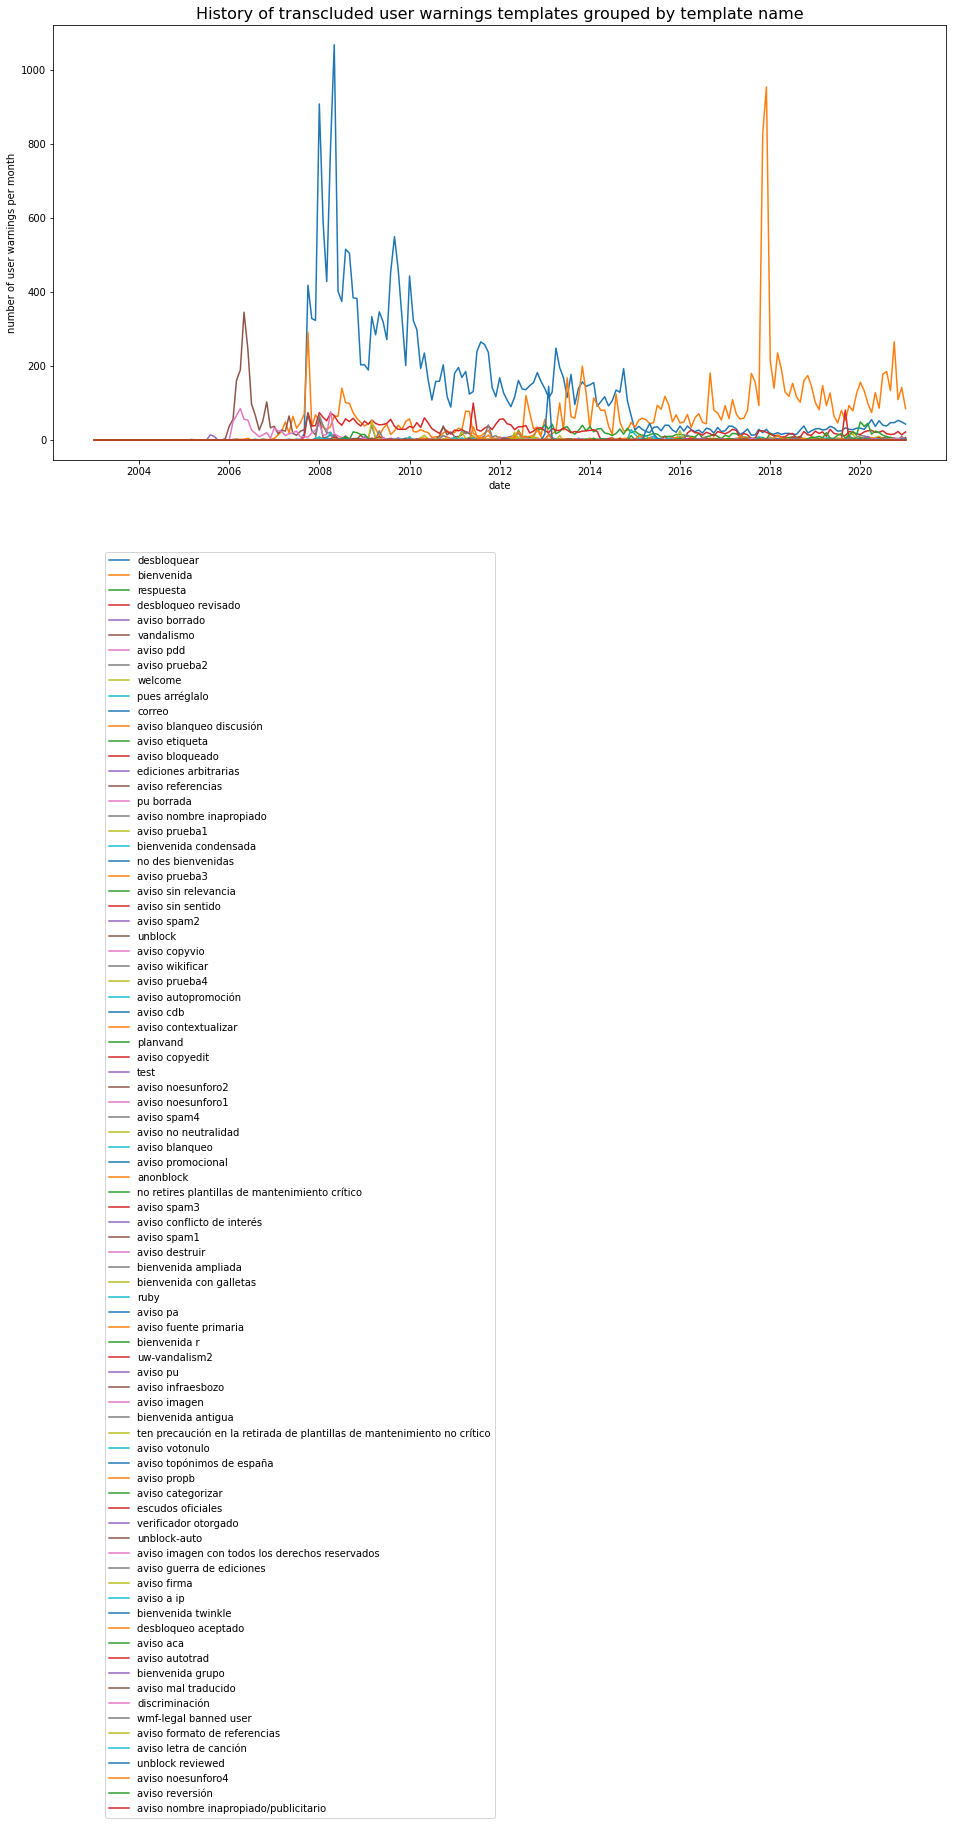

In [48]:
plt.figure(figsize=(16,8))
for u_w in user_warnings_by_name_transcluded_cleaned_df['user_warning_name'].unique():
    template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == u_w]
    template_name = template_name.loc[template_name['date'] <= date(2021, 2, 1)]
    plt.plot(template_name['date'], template_name['count'], label = u_w)
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded user warnings templates grouped by template name', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [49]:
user_warnings_by_name_transcluded_cleaned_df.loc[user_warnings_by_name_transcluded_cleaned_df['count'] == user_warnings_by_name_transcluded_cleaned_df['count'].max()]

user_warning_name        date  count
5376       desbloquear  2008-05-01   1067

In [50]:
fig = px.line(user_warnings_by_name_transcluded_cleaned_df, x='date', y='count', color='user_warning_name', title='History of transcluded user warnings templates grouped by template name')
fig.show()

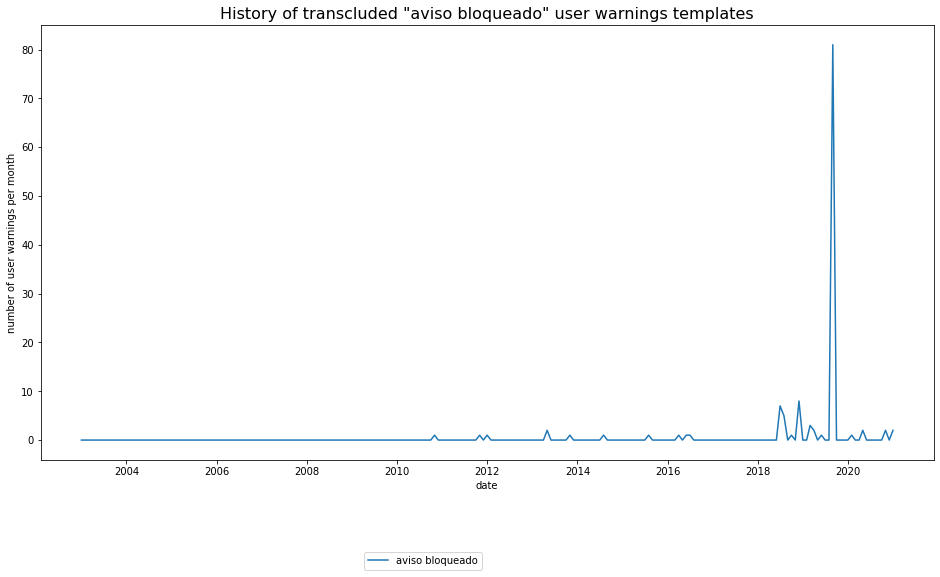

In [51]:
# aviso bloqueado
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'aviso bloqueado']
plt.plot(template_name['date'], template_name['count'], label = 'aviso bloqueado')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "aviso bloqueado" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [52]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
16813   aviso bloqueado  2019-09-01     81

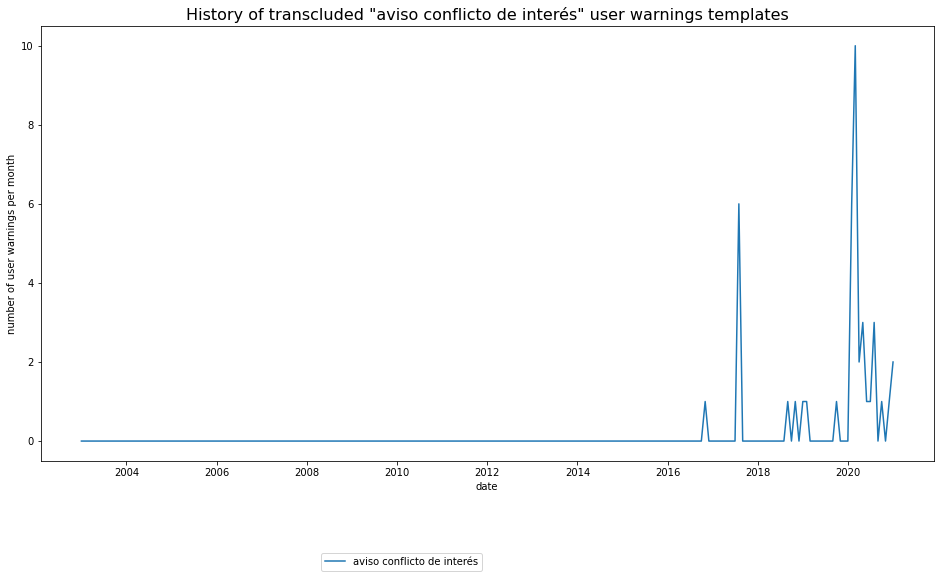

In [53]:
# aviso conflicto de interés
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'aviso conflicto de interés']
plt.plot(template_name['date'], template_name['count'], label = 'aviso conflicto de interés')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "aviso conflicto de interés" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [54]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
17348  aviso conflicto de interés  2020-03-01     10

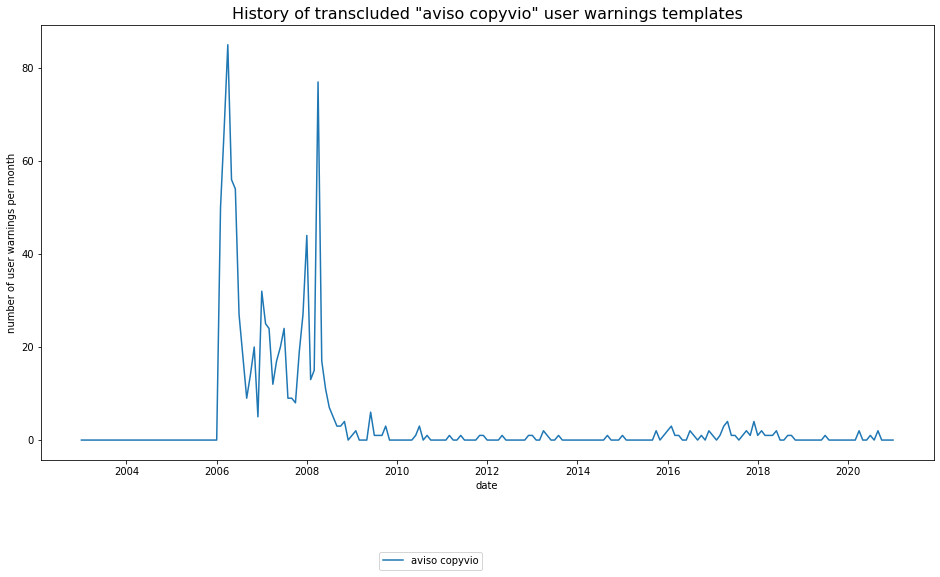

In [55]:
# aviso copyvio
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'aviso copyvio']
plt.plot(template_name['date'], template_name['count'], label = 'aviso copyvio')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "aviso copyvio" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [56]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
3302     aviso copyvio  2006-04-01     85

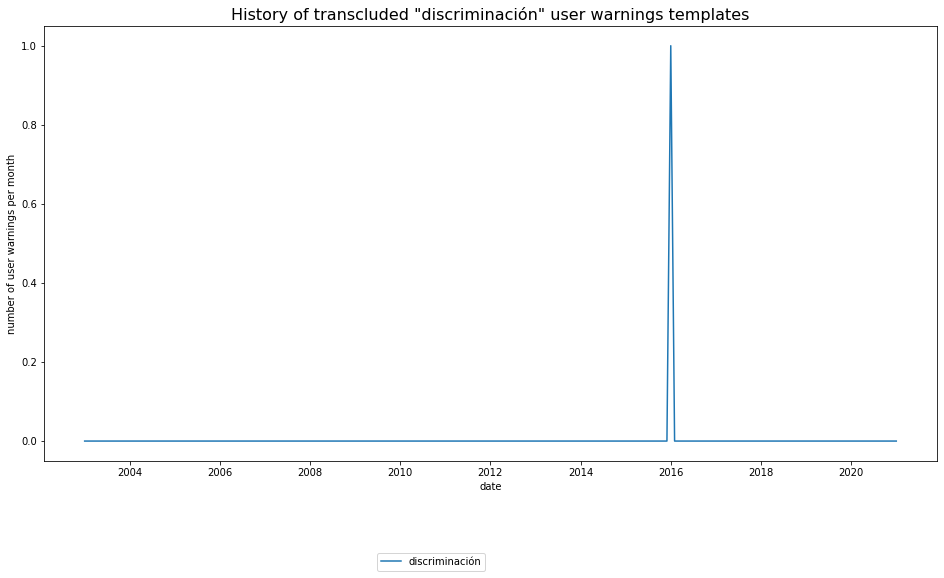

In [57]:
# discriminación
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'discriminación']
plt.plot(template_name['date'], template_name['count'], label = 'discriminación')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "discriminación" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [58]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
13180    discriminación  2016-01-01      1

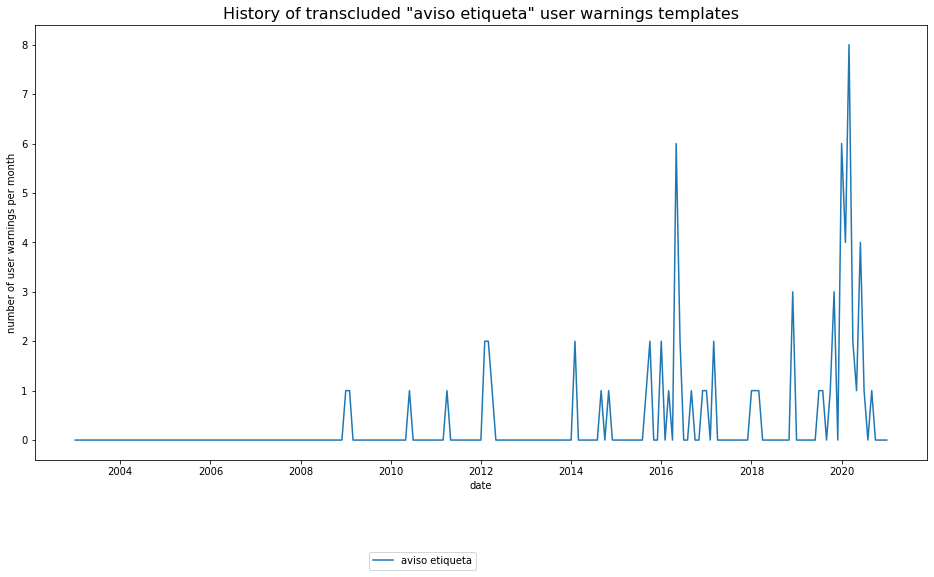

In [59]:
# aviso etiqueta
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'aviso etiqueta']
plt.plot(template_name['date'], template_name['count'], label = 'aviso etiqueta')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "aviso etiqueta" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [60]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
17316    aviso etiqueta  2020-03-01      8

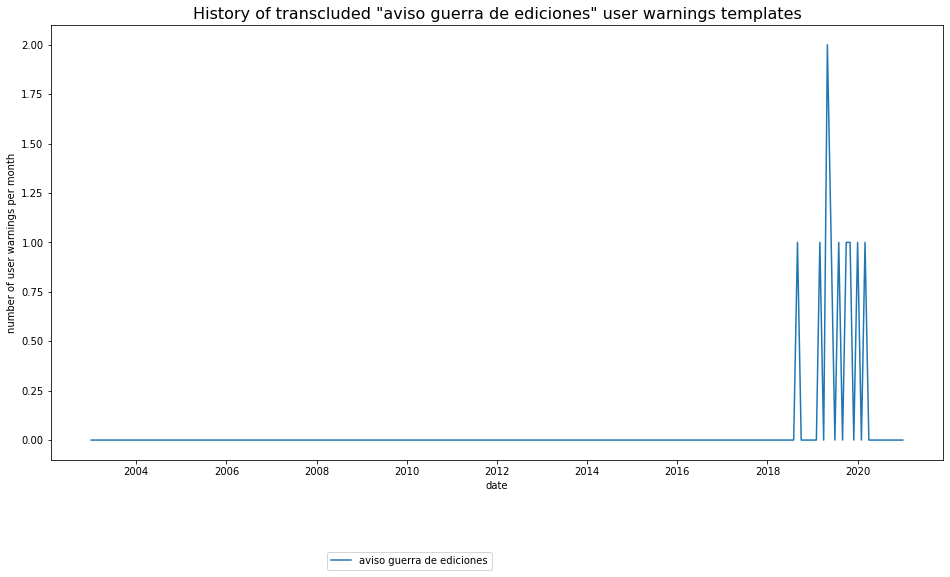

In [61]:
# aviso guerra de ediciones
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'aviso guerra de ediciones']
plt.plot(template_name['date'], template_name['count'], label = 'aviso guerra de ediciones')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "aviso guerra de ediciones" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [62]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
16531  aviso guerra de ediciones  2019-05-01      2

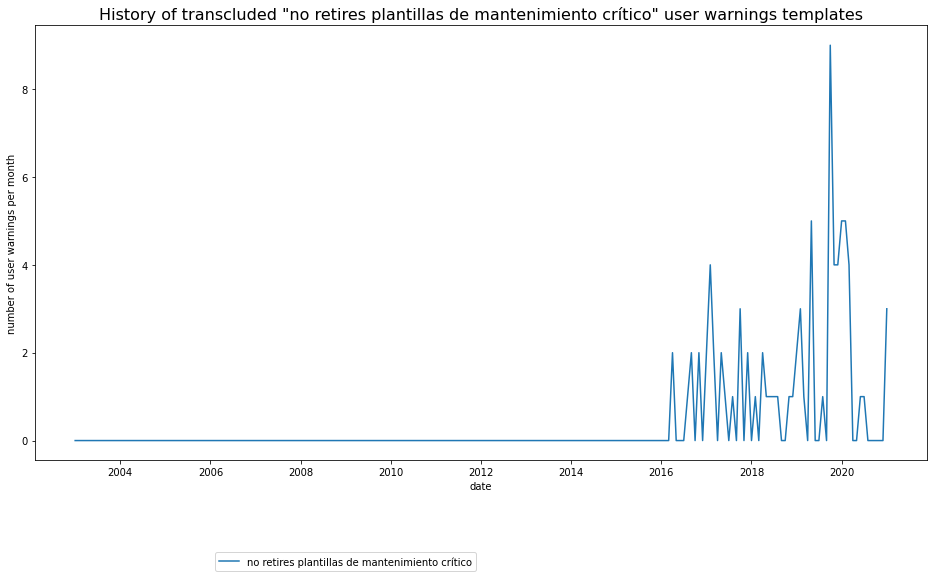

In [63]:
# no retires plantillas de mantenimiento crítico
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'no retires plantillas de mantenimiento crítico']
plt.plot(template_name['date'], template_name['count'], label = 'no retires plantillas de mantenimiento crítico')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "no retires plantillas de mantenimiento crítico" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [64]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
16926  no retires plantillas de mantenimiento crítico  2019-10-01      9

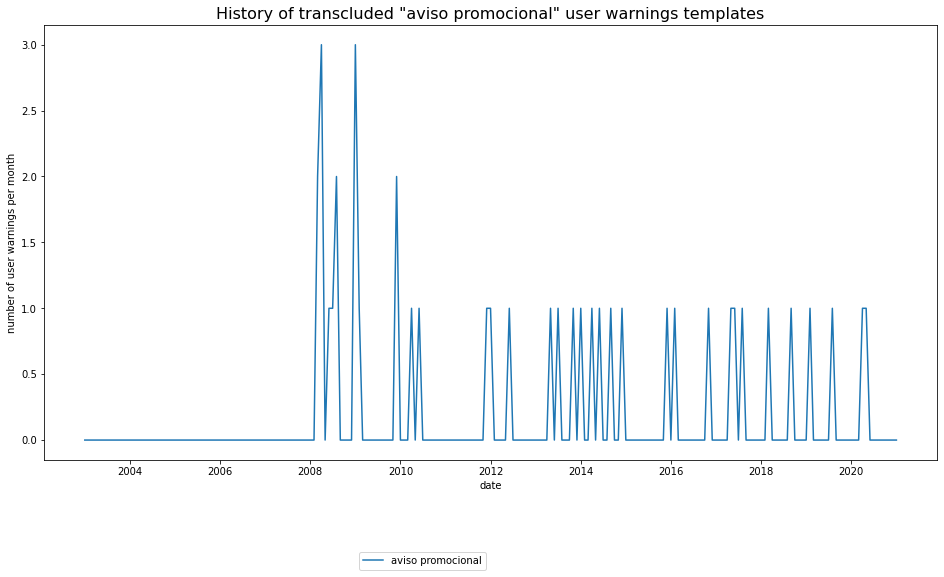

In [65]:
# aviso promocional
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'aviso promocional']
plt.plot(template_name['date'], template_name['count'], label = 'aviso promocional')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "aviso promocional" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [66]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
5332  aviso promocional  2008-04-01      3
6088  aviso promocional  2009-01-01      3

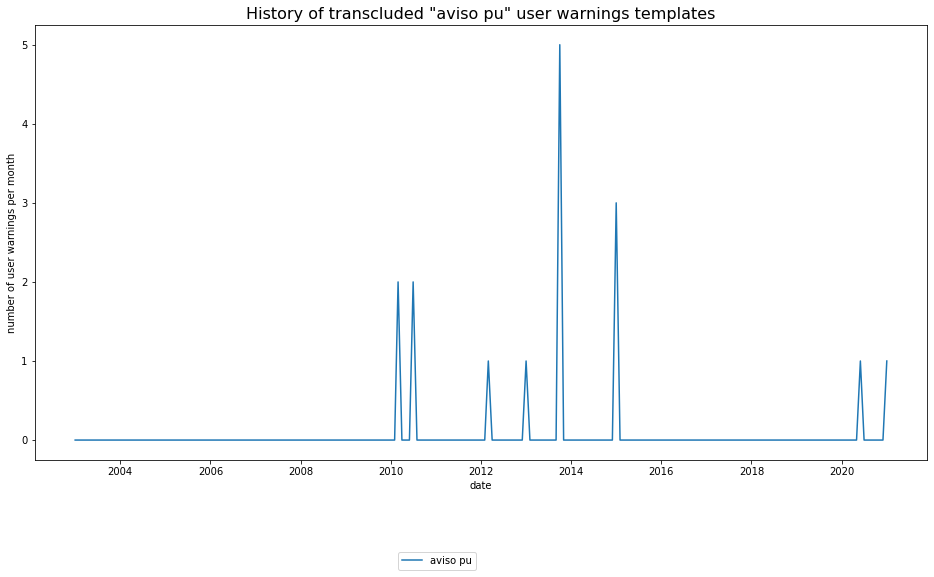

In [67]:
# aviso pu
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'aviso pu']
plt.plot(template_name['date'], template_name['count'], label = 'aviso pu')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "aviso pu" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [68]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
10890          aviso pu  2013-10-01      5

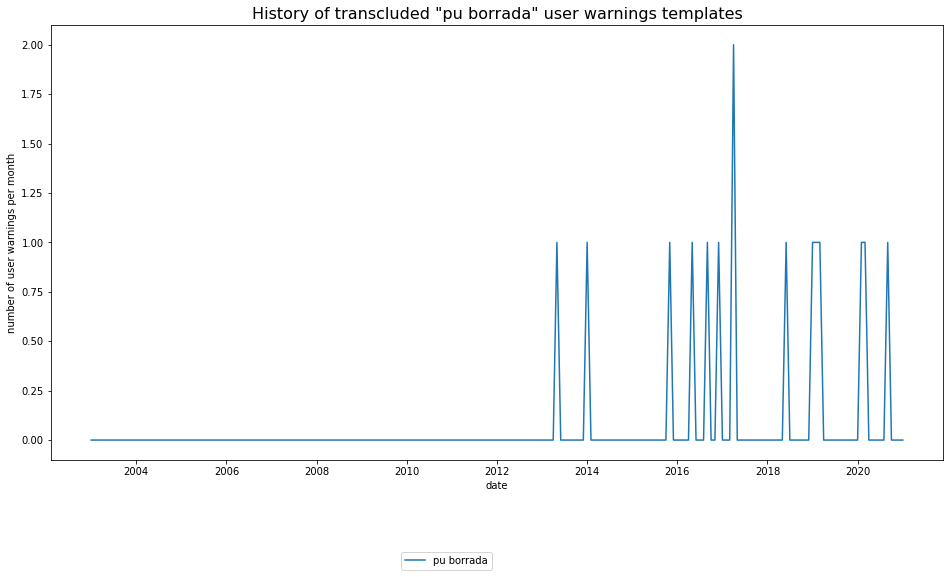

In [69]:
# pu borrada
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'pu borrada']
plt.plot(template_name['date'], template_name['count'], label = 'pu borrada')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "pu borrada" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [70]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
14380        pu borrada  2017-04-01      2

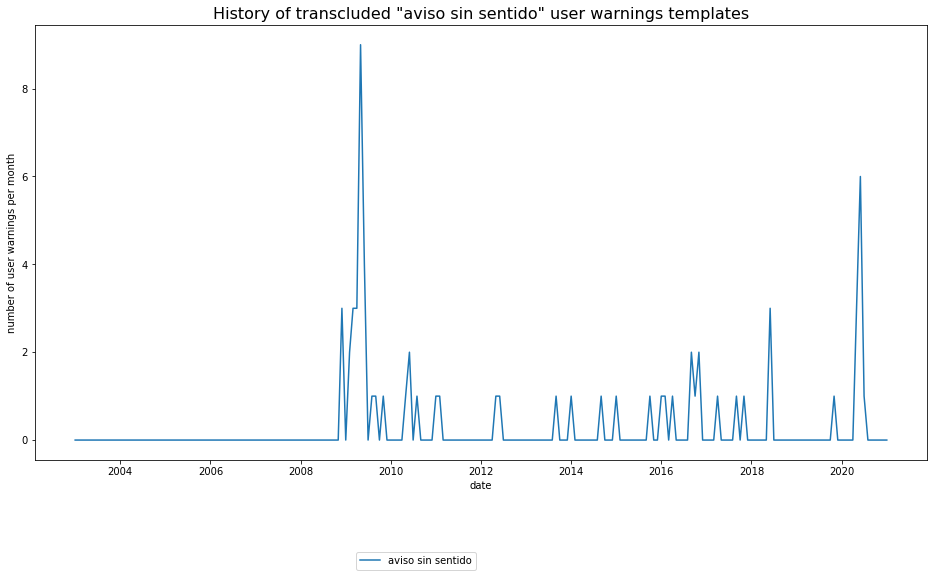

In [71]:
# aviso sin sentido
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'aviso sin sentido']
plt.plot(template_name['date'], template_name['count'], label = 'aviso sin sentido')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "aviso sin sentido" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [72]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
6407  aviso sin sentido  2009-05-01      9

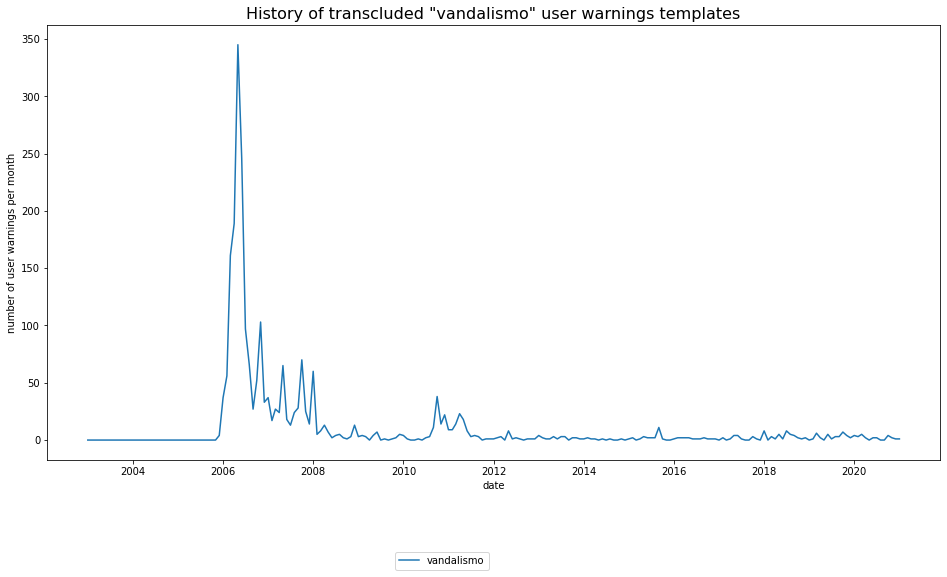

In [73]:
# vandalismo
plt.figure(figsize=(16,8))
template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == 'vandalismo']
plt.plot(template_name['date'], template_name['count'], label = 'vandalismo')
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of transcluded "vandalismo" user warnings templates', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

In [74]:
template_name.loc[template_name['count'] == template_name['count'].max()]

user_warning_name        date  count
3365        vandalismo  2006-05-01    345

### On some interesting warnings

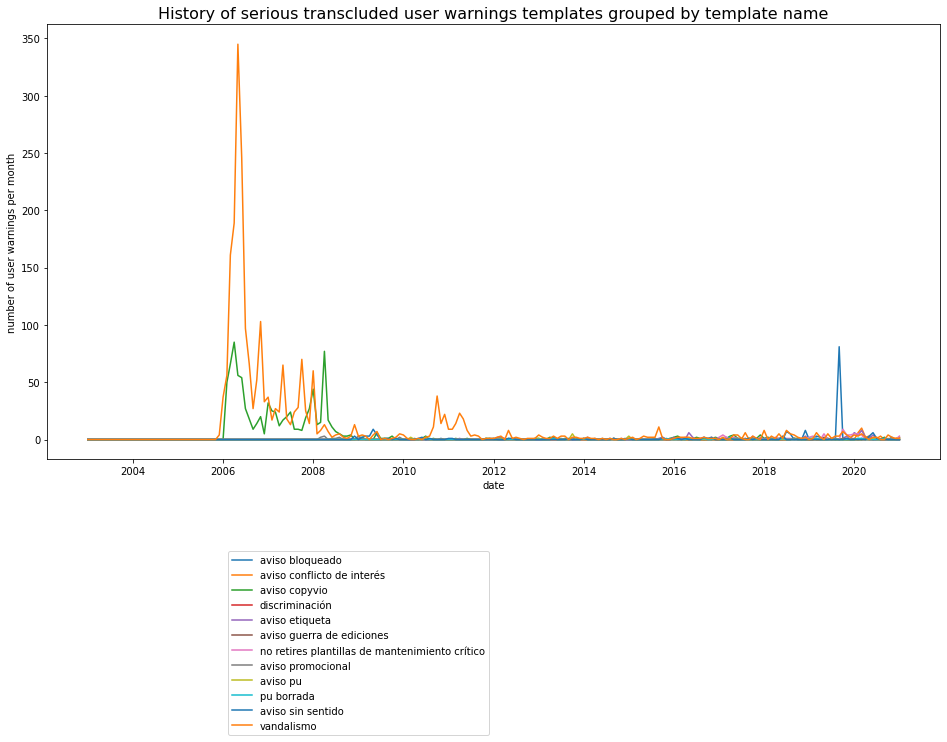

In [75]:
interesting_user_warnings = [
    'aviso bloqueado',
    'aviso conflicto de interés',
    'aviso copyvio',
    'discriminación',
    'aviso etiqueta',
    'aviso guerra de ediciones',
    'no retires plantillas de mantenimiento crítico',
    'aviso promocional',
    'aviso pu',
    'pu borrada',
    'aviso sin sentido',
    'vandalismo'
]
plt.figure(figsize=(16,8))
for u_w in interesting_user_warnings:
    template_name = user_warnings_by_name_transcluded_cleaned_df[user_warnings_by_name_transcluded_cleaned_df['user_warning_name'] == u_w]
    plt.plot(template_name['date'], template_name['count'], label = u_w)
plt.legend(bbox_to_anchor=(0.5, -0.2))
plt.title('History of serious transcluded user warnings templates grouped by template name', fontsize=16)
plt.ylabel('number of user warnings per month')
plt.xlabel('date')
plt.show()

## Parameter analisys

In [76]:
user_warnings_by_name_df.head()

id_talk_page             name user_warning_name     category  \
0       4363568     80.27.161.36       desbloquear  not_serious   
1       4365383   189.217.219.20       desbloquear  not_serious   
2       4366183  MariaFde.Moreno        bienvenida  not_serious   
3       4366213         Jomapeca         respuesta  not_serious   
4       4366213         Jomapeca        bienvenida  not_serious   

                                          parameters  transcluded        date  \
0  [{'options': {'1': 'Motivo de desbloqueo'}, 't...         True  2010-12-01   
1  [{'options': {'1': 'Motivo de desbloqueo'}, 't...         True  2010-12-01   
2  [{'options': {}, 'timestamp': '2010-12-20T10:0...         True  2010-12-01   
3  [{'options': {'2': 'Ayuda', '3': '--[[Usuario:...         True  2012-12-01   
4  [{'options': {}, 'timestamp': '2010-12-20T12:5...         True  2010-12-01   

   count  
0      1  
1      1  
2      1  
3      1  
4      1

## Extract parameters for the most important user warnings

In [77]:
interesting_user_warnings_df_list = [list() for _ in interesting_user_warnings]
for i, user_warning in enumerate(interesting_user_warnings):
    if not os.path.isfile('spanish_precompiled_df/interesting_user_warnings_{}.pkl'.format(user_warning)):
        extracted = user_warnings_by_name_df.loc[user_warnings_by_name_df['user_warning_name'] == user_warning]
        for j, row in extracted.iterrows():
            for el in row['parameters']:
                new_row = row
                new_row = new_row.drop('parameters')
                new_row['parameters'] = el['options']
                interesting_user_warnings_df_list[i].append(new_row)
        interesting_user_warnings_df_list[i] = pd.DataFrame(interesting_user_warnings_df_list[i]).reset_index(drop=True)
        interesting_user_warnings_df_list[i].to_pickle('spanish_precompiled_df/interesting_user_warnings_{}.pkl'.format(user_warning))
    else:
        interesting_user_warnings_df_list[i] = pd.read_pickle('spanish_precompiled_df/interesting_user_warnings_{}.pkl'.format(user_warning))

In [78]:
interesting_user_warnings_df_list[0].head()

id_talk_page               name user_warning_name category  transcluded  \
0       4388558             Ontzak   aviso bloqueado  serious         True   
1       9444710  Blanca paloma 123   aviso bloqueado  serious         True   
2       9670361     Windroid134554   aviso bloqueado  serious         True   
3       9689996      Tebyamazondem   aviso bloqueado  serious         True   
4       9742967           Habier31   aviso bloqueado  serious         True   

         date  count                                   parameters  
0  2018-08-01      1                                           {}  
1  2020-05-01      1              {'1': 'Ediciones arbitriarias'}  
2  2020-11-01      1  {'1': 'desbloqueenme no hag el vandalismo'}  
3  2020-11-01      1                          {'1': '[[WP:R3R]]'}  
4  2021-01-01      1        {'1': 'Falta de etiqueta e insultos'}

## Most used parameters per template

In [79]:
# dataframes for wikibreaks with param name and value
last_axes = None
most_used_parameters_per_template_df_list = list()

for i, user_warning in enumerate(interesting_user_warnings_df_list):
    # grouping
    if not os.path.isfile('spanish_precompiled_df/most_used_parameters_per_template_{}.pkl'.format(interesting_user_warnings[i])):
        print('spanish_precompiled_df/most_used_parameters_per_template_{}.pkl'.format(interesting_user_warnings[i]))
        extracted = interesting_user_warnings_df_list[i]
        grouped = extracted.loc[extracted['parameters'] != {}, ['user_warning_name', 'parameters', 'count']]
        most_used_parameters_per_template_list = list()
        for j, row in extracted.iterrows():
            for key, value in row['parameters'].items():
                new_row = row
                new_row = new_row.drop('parameters')
                new_row['param_name'] = key
                new_row['param_value'] = value
                most_used_parameters_per_template_list.append(new_row)
        most_used_parameters_per_template_df_list.append(pd.DataFrame(most_used_parameters_per_template_list).reset_index(drop=True))
        most_used_parameters_per_template_df_list[-1].to_pickle('spanish_precompiled_df/most_used_parameters_per_template_{}.pkl'.format(interesting_user_warnings[i]))
    else:
        most_used_parameters_per_template_df_list.append(pd.read_pickle('spanish_precompiled_df/most_used_parameters_per_template_{}.pkl'.format(interesting_user_warnings[i])))

## most_used_parameters_per_template_df_list[0].head()

In [80]:
most_used_parameters_per_template_grouped_df_list = list()
for i, user_warning in enumerate(interesting_user_warnings_df_list):
    # grouping
    extracted = most_used_parameters_per_template_df_list[i]
    if not extracted.empty:
        extracted['param_name'] = extracted['param_name'].str.strip()
        extracted = extracted[['count', 'user_warning_name', 'param_name']].groupby(['param_name', 'user_warning_name']).count().reset_index(drop=False)
    most_used_parameters_per_template_grouped_df_list.append(extracted)
most_used_parameters_per_template_grouped_df_list[0].head()

param_name user_warning_name  count
0                                                  1   aviso bloqueado     24
1  nueva evasión de bloqueo, ver [https://es.wiki...   aviso bloqueado      1

## Most used parameters per user warnings

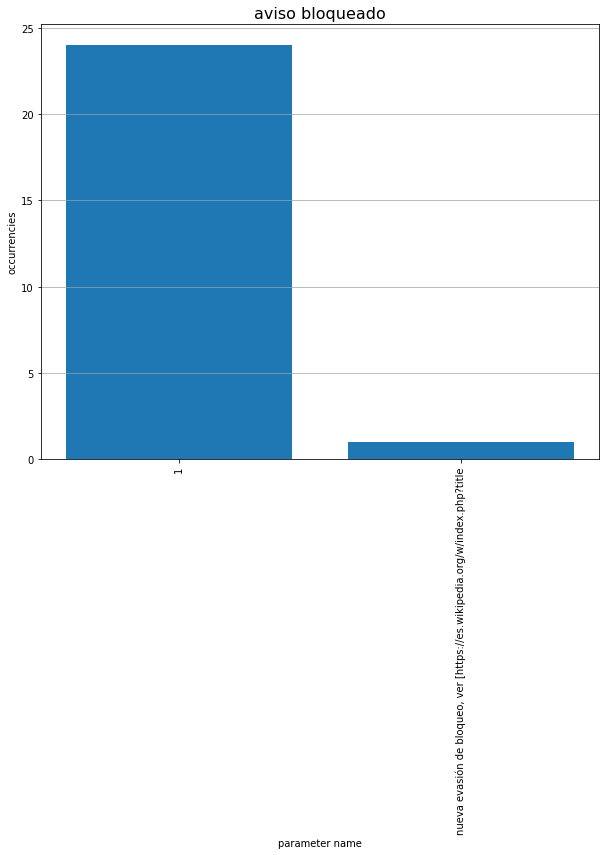

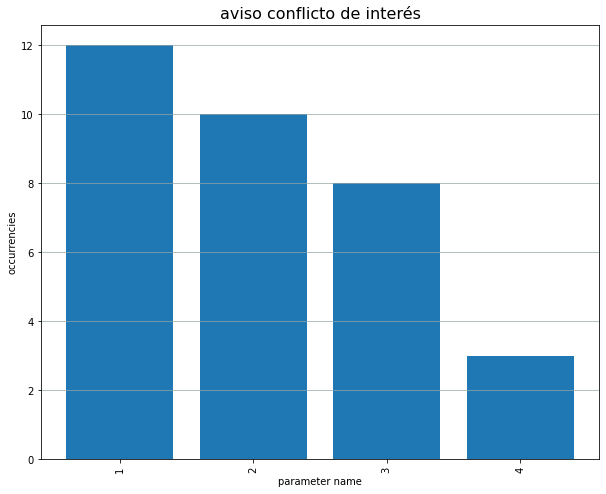

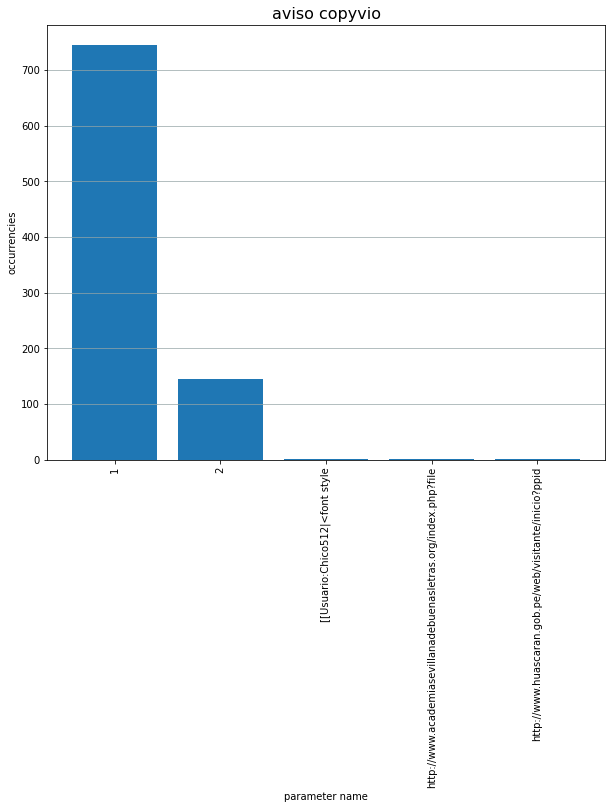

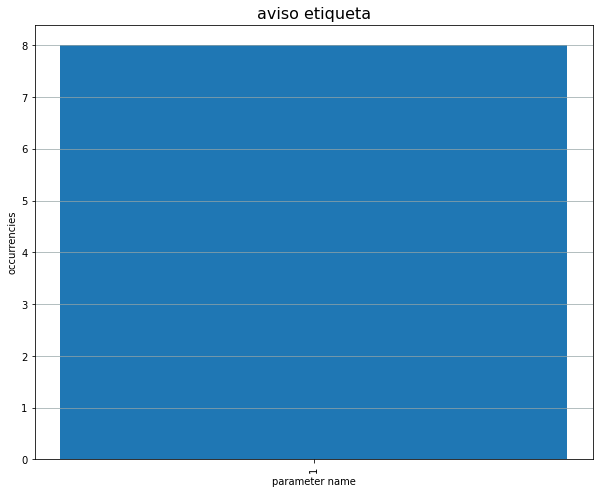

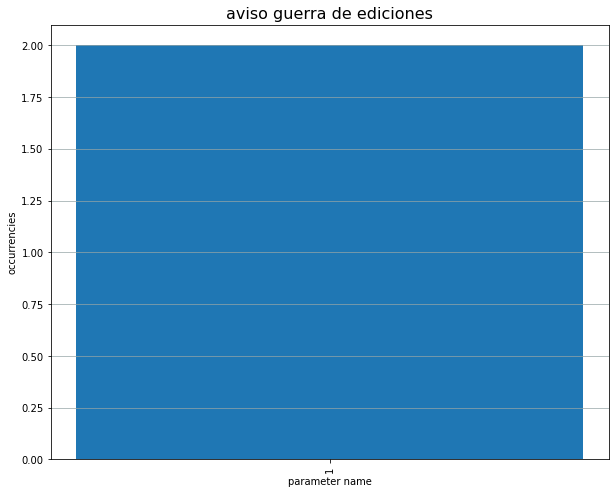

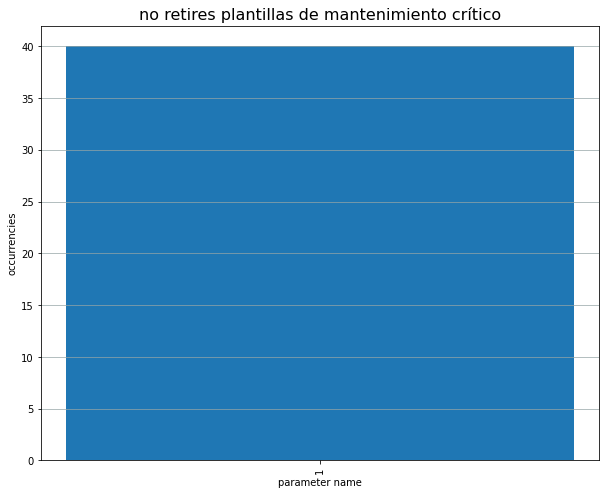

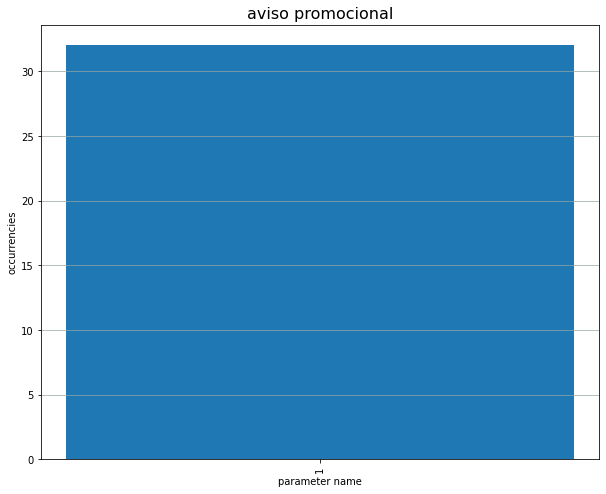

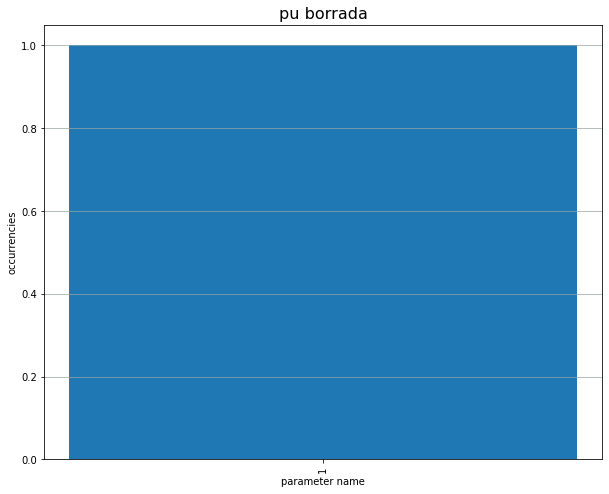

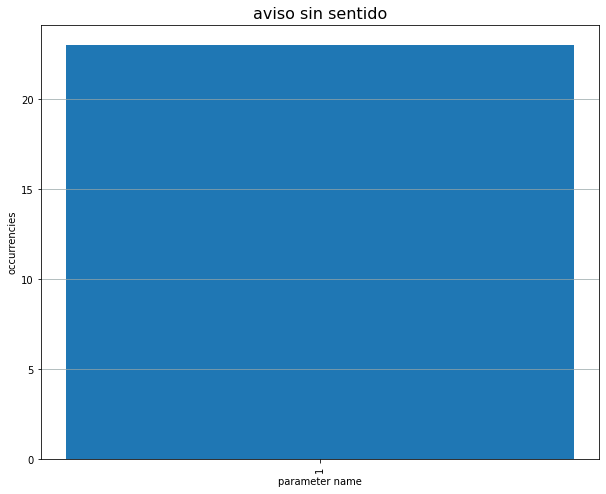

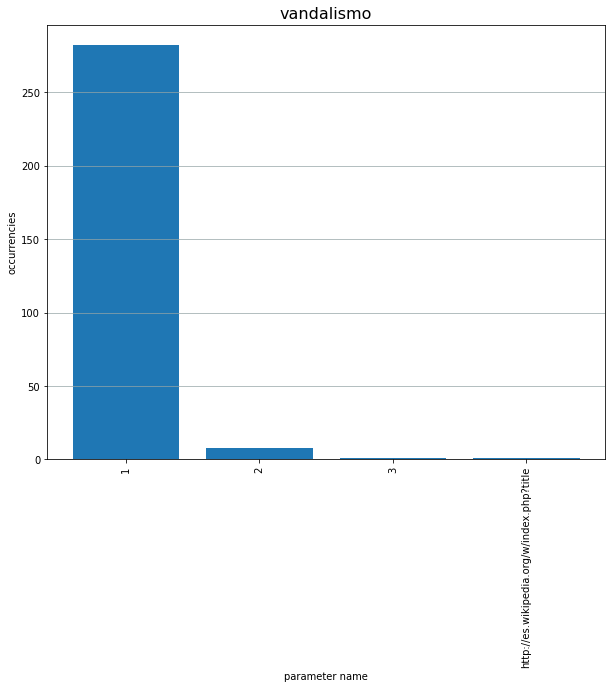

In [81]:
for i, user_warning in enumerate(interesting_user_warnings):
    # grouping
    extracted = most_used_parameters_per_template_grouped_df_list[i].drop_duplicates()
    
    if not extracted.empty:
        extracted = extracted.sort_values(by=['count'], ascending = False)
        first_five = extracted[:10]
        plt.figure(figsize=(10,8))
        plt.bar(first_five['param_name'], first_five['count'])
        plt.title(user_warning, fontsize=16)
        plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
        plt.xticks(rotation='vertical')
        plt.ylabel('occurrencies')
        plt.xlabel('parameter name')
        plt.show()

## Some paramers in textual form

In [82]:
for i, user_warning in enumerate(interesting_user_warnings):
    # grouping
    extracted = most_used_parameters_per_template_grouped_df_list[i]
    
    if not extracted.empty:
        print('User warning {}:'.format(user_warning))
        print('------------------------------------------------------------------')
        parameters_list = extracted.sort_values(by=['count'], ascending = False)
        parameters_list = parameters_list['param_name']
        parameters_list = parameters_list[:5]
        original_values = most_used_parameters_per_template_df_list[i].drop_duplicates()
        for param in parameters_list:
            print('param named: {}'.format(param))
            values = original_values.loc[original_values['param_name'] == param, ['count', 'param_name', 'param_value', 'user_warning_name']].groupby(['param_name', 'param_value', 'user_warning_name']).count().reset_index(drop=False)
            values = values.sort_values(by=['count'], ascending = False)
            values = values[:5]
            for index, row in values.iterrows():
                val = row['param_value']
                counter = row['count']
                print('\tParam value {} counter {}'.format(val, counter))
        print('------------------------------------------------------------------')

User warning aviso bloqueado:
------------------------------------------------------------------
param named: 1
	Param value Vandalismo, violaciones de etiqueta y ediciones sin sentido counter 2
	Param value Autopromoción counter 1
	Param value cuenta de propósito particular para hacer publicidad counter 1
	Param value violación de las reglas de etiqueta counter 1
	Param value violación de la [[WP:R3R|regla de las tres reversiones]] en el artículo [[Felipe VI de España]] counter 1
param named: nueva evasión de bloqueo, ver [https://es.wikipedia.org/w/index.php?title
	Param value Usuariodiscusi%C3%B3n:Alelapenya&diff=prev&oldid=112435110&diffmode=source aquí] counter 1
------------------------------------------------------------------
User warning aviso conflicto de interés:
------------------------------------------------------------------
param named: 1
	Param value posible counter 8
	Param value 2 counter 1
	Param value <Gonzalo Ritacco> counter 1
	Param value Matilde Camus counter 1